In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

In [3]:
#Goal is to predict quality of wine from rest of data with a
#Random Forest Classifier

#read in data
whiteData = pd.read_csv("winequality-white.csv", sep=';')
redData = pd.read_csv("winequality-red.csv", sep=';')

#seperate target from data
Yw = whiteData['quality']
Xw = whiteData.loc[:,'fixed acidity':'alcohol']
#Bazinga 
Yr = redData['quality']
Xr = redData.loc[:,'fixed acidity':'alcohol']

#Set up train and test data
Xw_train, Xw_test, Yw_train, Yw_test = train_test_split(Xw, Yw, test_size=0.3, random_state=42)
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(Xr, Yr, test_size=0.3, random_state=42)

attributes = whiteData.columns[:11]

#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train[attributes], Yw_train)
Wpreds = clfW.predict(Xw_test[attributes])

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy:', correct, '/', len(Yw_test.values))


Random Forest CLassifier accuracy: 1019 / 1470


In [5]:

attributes_red = redData.columns[:11]
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train[attributes_red], Yr_train)
Rpreds = clfR.predict(Xr_test[attributes_red])
counter = 0
correct = 0
j=0

for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy:', correct, '/', len(Yr_test.values))

Random Forest CLassifier accuracy: 316 / 480


In [26]:
#SVM TEST WHITE
clfSVMw = svm.SVC(kernel = 'linear')
clfSVMw.fit(Xw_train[attributes], Yw_train)
SVMwPreds = clfSVMw.predict(Xw_test[attributes])

[6 6 6 ... 6 6 6]


In [62]:
print("Accuracy:", metrics.accuracy_score(Yw_test.values, SVMwPreds))

correct = 0
j = 0
for pred in SVMwPreds:
    if SVMwPreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('SVM Accuracy:', correct, '/', len(Yw_test.values))
print(np.unique(SVMwPreds))
#SVM IS SHIT LAME AF

Accuracy: 0.5204081632653061
SVM Accuracy: 765 / 1470
[5 6]


In [56]:
#Red Wine Linear test
clfSVMr = svm.SVC(kernel = 'linear')
clfSVMr.fit(Xr_train[attributes], Yr_train)
SVMrPreds = clfSVMr.predict(Xr_test[attributes])

In [69]:
print("Accuracy:", metrics.accuracy_score(Yr_test.values, SVMrPreds))
print(np.unique(SVMrPreds))
print(np.unique(Yr_train.values))

Accuracy: 0.5041666666666667
[5 6 7]
[3 4 5 6 7 8]


In [58]:
#Red Wine non-Linear test still SVM
clfSVMr = svm.SVC(kernel = 'rbf')
clfSVMr.fit(Xr_train[attributes], Yr_train)
SVMrPreds = clfSVMr.predict(Xr_test[attributes])
print("Accuracy:", metrics.accuracy_score(Yr_test.values, SVMrPreds))
#WOW EVEN WORSE GREAT

Accuracy: 0.5041666666666667


In [116]:
#more svm testing
#Basically gonna try and combine forest and svm
#It didnt work any better than just forest
print(np.unique(Yr_train))
#Create model to determine quality either [3,4,5] or [6,7,8] 
#Create another model for each
correct = 0
j = 0
for pred in SVMrPreds:
    if SVMrPreds[j] <= 5 and SVMrPreds[j] <= Yr_test.values[j]:
        correct += 1
    elif SVMrPreds[j] >= Yr_test.values[j]:
        correct += 1
    j=j+1
print('SVM Accuracy:', correct, '/', len(Yr_test.values))
print(np.unique(SVMrPreds))
SVMPreds = np.asarray([])
counter = 0
for pred in SVMrPreds:
    if SVMrPreds[counter] > 5:
        SVMPreds = np.insert(SVMPreds, len(SVMPreds), True, 0)
    else:
        SVMPreds = np.insert(SVMPreds, len(SVMPreds), False, 0)
    counter += 1

[3 4 5 6 7 8]
SVM Accuracy: 420 / 480
[5 6 7]


In [95]:
#Add svm results back to data and run RFClf
SVMtrainPreds = clfSVMr.predict(Xr_train[attributes])

correct = 0
j = 0
for pred in SVMtrainPreds:
    if SVMtrainPreds[j] <= 5 and SVMtrainPreds[j] <= Yr_train.values[j]:
        correct += 1
    elif SVMtrainPreds[j] >= Yr_train.values[j]:
        correct += 1
    j=j+1
print('SVM Accuracy:', correct, '/', len(Yr_train.values))

SVMtPreds = np.asarray([])
counter = 0
for pred in SVMtrainPreds:
    if SVMtrainPreds[counter] > 5:
        SVMtPreds = np.insert(SVMtPreds, len(SVMtPreds), True, 0)
    else:
        SVMtPreds = np.insert(SVMtPreds, len(SVMtPreds), False, 0)
    counter += 1
print(SVMtPreds)

SVM Accuracy: 988 / 1119
[1. 1. 0. ... 0. 1. 1.]


In [ ]:
#Get actual more than 5 vals inserted
#U can maybe ignore this, uncomment some stuff below if shit doesnt work

In [112]:
#Xr_train.insert(0, "more_than", SVMtPreds)
#Xr_test.insert(0, "more_than", SVMPreds)
Xr_test.head()

,more_than,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,0.0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,0.0,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,1.0,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,1.0,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,1.0,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [118]:
#Now with SVM data!!
attributes_red = redData.columns[:11]
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train, Yr_train)
Rpreds = clfR.predict(Xr_test)
counter = 0
correct = 0
j=0

for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy:', correct, '/', len(Yr_test.values))
print(np.unique(Rpreds))

Random Forest CLassifier accuracy: 316 / 480
[5 6 7 8]


In [120]:
#Testing how good RFC is at determing if more than 5
correct = 0
j = 0
for pred in Rpreds:
    if Rpreds[j] <= 5 and Rpreds[j] <= Yr_test.values[j]:
        correct += 1
    elif Rpreds[j] >= Yr_test.values[j]:
        correct += 1
    j=j+1
print('RFC Accuracy:', correct, '/', len(Yr_test.values))
#more accurate than svm so whats the point

RFC Accuracy: 442 / 480


In [121]:
SVMtrainPreds = clfR.predict(Xr_train)
SVMPreds = np.asarray([])
counter = 0
for pred in Rpreds:
    if Rpreds[counter] > 5:
        SVMPreds = np.insert(SVMPreds, len(SVMPreds), True, 0)
    else:
        SVMPreds = np.insert(SVMPreds, len(SVMPreds), False, 0)
    counter += 1
    
SVMtPreds = np.asarray([])
counter = 0
for pred in SVMtrainPreds:
    if SVMtrainPreds[counter] > 5:
        SVMtPreds = np.insert(SVMtPreds, len(SVMtPreds), True, 0)
    else:
        SVMtPreds = np.insert(SVMtPreds, len(SVMtPreds), False, 0)
    counter += 1

In [122]:
Xr_train.insert(0, "more_than", SVMtPreds)
Xr_test.insert(0, "more_than", SVMPreds)

In [125]:
#Now with extra RFC data!!
attributes_red = redData.columns[:11]
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train, Yr_train)
Rpreds = clfR.predict(Xr_test)
counter = 0
correct = 0
j=0

for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy:', correct, '/', len(Yr_test.values))
#Zero effect! Makes sense I guess what a waste of fucking time

Random Forest CLassifier accuracy: 316 / 480


In [4]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
k=neigh.fit(Xw_train, Yw_train)
kpred=k.predict(Xw_test[attributes])
counter = 0
correct = 0
j=0

for pred in kpred:
    if kpred[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('K nearest neighbor CLassifier accuracy:', correct, '/', len(Yw_test.values))


K nearest neighbor CLassifier accuracy: 822 / 1470


In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
k=neigh.fit(Xr_train, Yr_train)
kpred=k.predict(Xr_test[attributes])
counter = 0
correct = 0
j=0

for pred in kpred:
    if kpred[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('K nearest neighbor CLassifierr accuracy:', correct, '/', len(Yr_test.values))


K nearest neighbor CLassifierr accuracy: 252 / 480


In [6]:
#K nearest neighbor is less accurate than random forest classifiers

In [10]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['fixed acidity'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['fixed acidity'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
predFAw=correct
print('Random Forest CLassifier accuracy for fixed acidity in white wine:', correct, '/', len(Yw_test.values))

#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['fixed acidity'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['fixed acidity'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for fixed acidity in red wine  :', correct, '/', len(Yr_test.values))
predFAr=correct

Random Forest CLassifier accuracy for fixed acidity in white wine: 676 / 1470
Random Forest CLassifier accuracy for fixed acidity in red wine  : 209 / 480


In [11]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['volatile acidity'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['volatile acidity'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for volatile acidity in white wine  :', correct, '/', len(Yw_test.values))
predVAw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['volatile acidity'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['volatile acidity'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for volatile acidity in red wine  :', correct, '/', len(Yr_test.values))
predVAr=correct

Random Forest CLassifier accuracy for volatile acidity in white wine  : 669 / 1470
Random Forest CLassifier accuracy for volatile acidity in red wine  : 226 / 480


In [12]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['citric acid'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['citric acid'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for citric acid  :', correct, '/', len(Yw_test.values))
predCAw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['citric acid'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['citric acid'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for citric acid in red wine  :', correct, '/', len(Yr_test.values))
predCAr=correct

Random Forest CLassifier accuracy for citric acid  : 695 / 1470
Random Forest CLassifier accuracy for citric acid in red wine  : 215 / 480


In [13]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['residual sugar'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['residual sugar'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for residual sugar in white wine  :', correct, '/', len(Yw_test.values))
predRSw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['residual sugar'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['residual sugar'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for residual sugar in red wine  :', correct, '/', len(Yr_test.values))
predRSr=correct

Random Forest CLassifier accuracy for residual sugar in white wine  : 679 / 1470
Random Forest CLassifier accuracy for residual sugar in red wine  : 218 / 480


In [14]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['chlorides'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['chlorides'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for chlorides in white wine :', correct, '/', len(Yw_test.values))
predCLw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['chlorides'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['chlorides'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for chlorides in red wine  :', correct, '/', len(Yr_test.values))
predCLr=correct

Random Forest CLassifier accuracy for chlorides in white wine : 669 / 1470
Random Forest CLassifier accuracy for chlorides in red wine  : 199 / 480


In [15]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['free sulfur dioxide'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['free sulfur dioxide'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for free sulfur dioxide  :', correct, '/', len(Yw_test.values))
predFSDw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['free sulfur dioxide'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['free sulfur dioxide'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for free sulfur dioxide in red wine  :', correct, '/', len(Yr_test.values))
predFSDr=correct

Random Forest CLassifier accuracy for free sulfur dioxide  : 680 / 1470
Random Forest CLassifier accuracy for free sulfur dioxide in red wine  : 222 / 480


In [16]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['total sulfur dioxide'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['total sulfur dioxide'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for total sulfur dioxide in white wine  :', correct, '/', len(Yw_test.values))
predTSDw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['total sulfur dioxide'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['total sulfur dioxide'].values.reshape(-1,1))
pred
#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for total sulfur dioxide in red wine  :', correct, '/', len(Yr_test.values))
predTSDr=correct

Random Forest CLassifier accuracy for total sulfur dioxide in white wine  : 662 / 1470
Random Forest CLassifier accuracy for total sulfur dioxide in red wine  : 219 / 480


In [17]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['density'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['density'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for density  :', correct, '/', len(Yw_test.values))
predDw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['density'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['density'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for density in red wine  :', correct, '/', len(Yr_test.values))
predDr=correct

Random Forest CLassifier accuracy for density  : 685 / 1470
Random Forest CLassifier accuracy for density in red wine  : 226 / 480


In [18]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['pH'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['pH'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for pH  :', correct, '/', len(Yw_test.values))
predPHw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['pH'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['pH'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for pH in red wine  :', correct, '/', len(Yr_test.values))
predPHr=correct

Random Forest CLassifier accuracy for pH  : 630 / 1470
Random Forest CLassifier accuracy for pH in red wine  : 216 / 480


In [19]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['sulphates'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['sulphates'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for sulphates  :', correct, '/', len(Yw_test.values))
predSUw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['sulphates'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['sulphates'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for sulphates in red wine  :', correct, '/', len(Yr_test.values))
predSUr=correct

Random Forest CLassifier accuracy for sulphates  : 635 / 1470
Random Forest CLassifier accuracy for sulphates in red wine  : 229 / 480


In [20]:
#Setting up classifier
clfW = RandomForestClassifier(n_jobs=2, random_state=0)
clfW.fit(Xw_train['alcohol'].values.reshape(-1,1), Yw_train.values.ravel())
Wpreds = clfW.predict(Xw_test['alcohol'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Wpreds:
    if Wpreds[j] == Yw_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for alcohol  :', correct, '/', len(Yw_test.values))
predALCw=correct
#Setting up classifier
clfR = RandomForestClassifier(n_jobs=2, random_state=0)
clfR.fit(Xr_train['alcohol'].values.reshape(-1,1), Yr_train.values.ravel())
Rpreds = clfR.predict(Xr_test['alcohol'].values.reshape(-1,1))

#Measuring accuracy
counter = 0
correct = 0
j=0
for pred in Rpreds:
    if Rpreds[j] == Yr_test.values[j]:
        correct += 1
    j=j+1
print('Random Forest CLassifier accuracy for alcohol in red wine  :', correct, '/', len(Yr_test.values))
predALCr=correct

Random Forest CLassifier accuracy for alcohol  : 734 / 1470
Random Forest CLassifier accuracy for alcohol in red wine  : 246 / 480


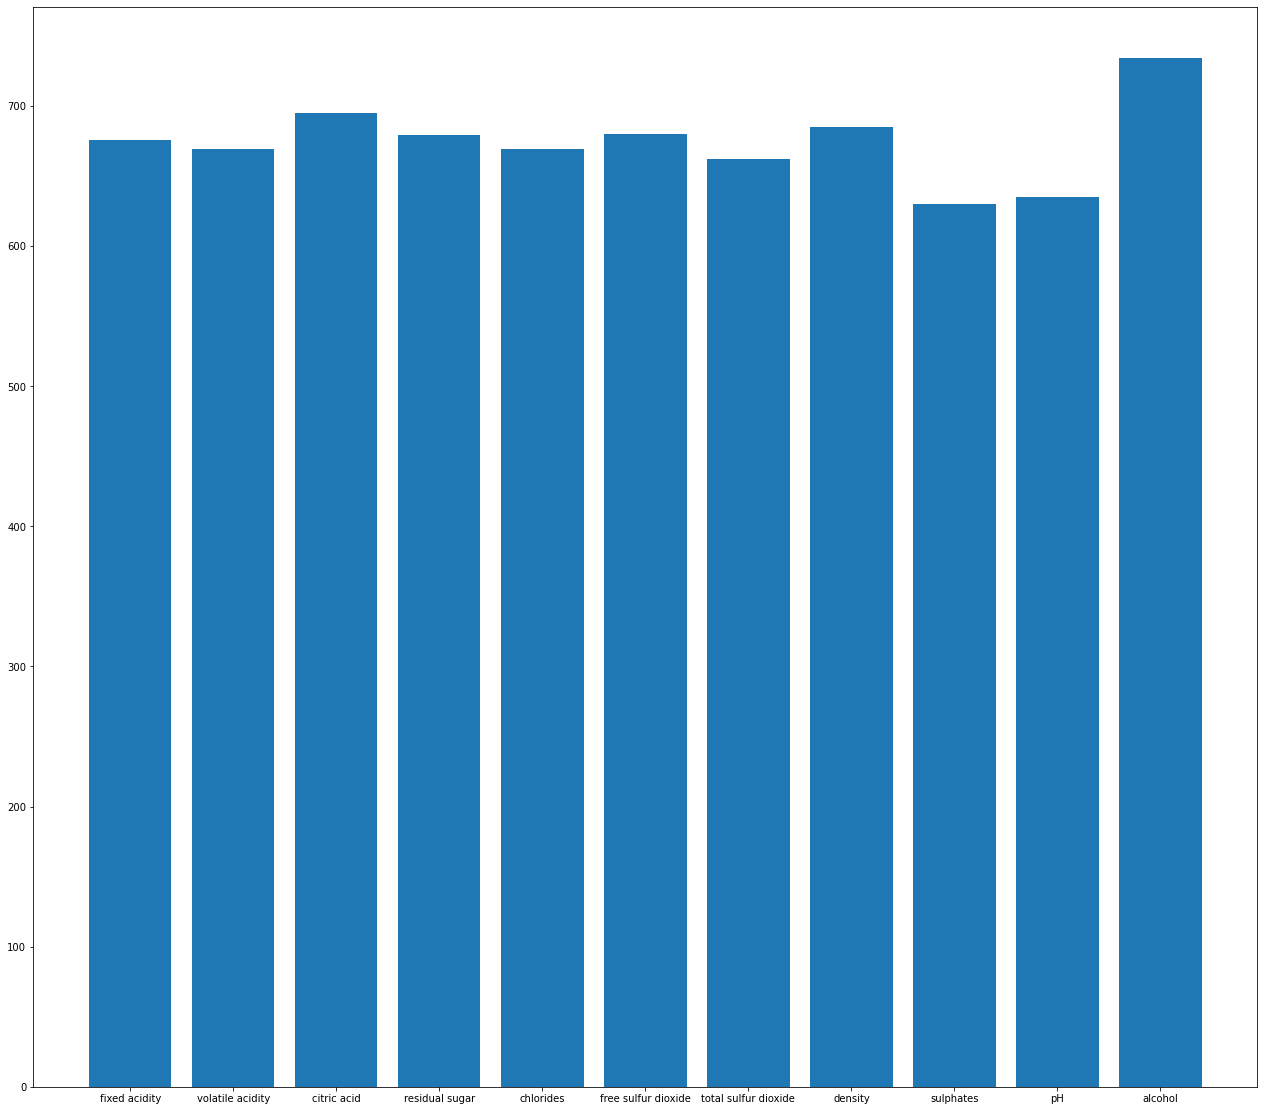

In [31]:
fig=plt.figure(figsize=(17,15))

ax=fig.add_axes([0,0,1,1])
att=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','pH','alcohol']
predicts=[predFAw,predVAw,predCAw,predRSw,predCLw,predFSDw,predTSDw,predDw,predPHw,predSUw,predALCw]
ax.bar(att,predicts)
plt.show()

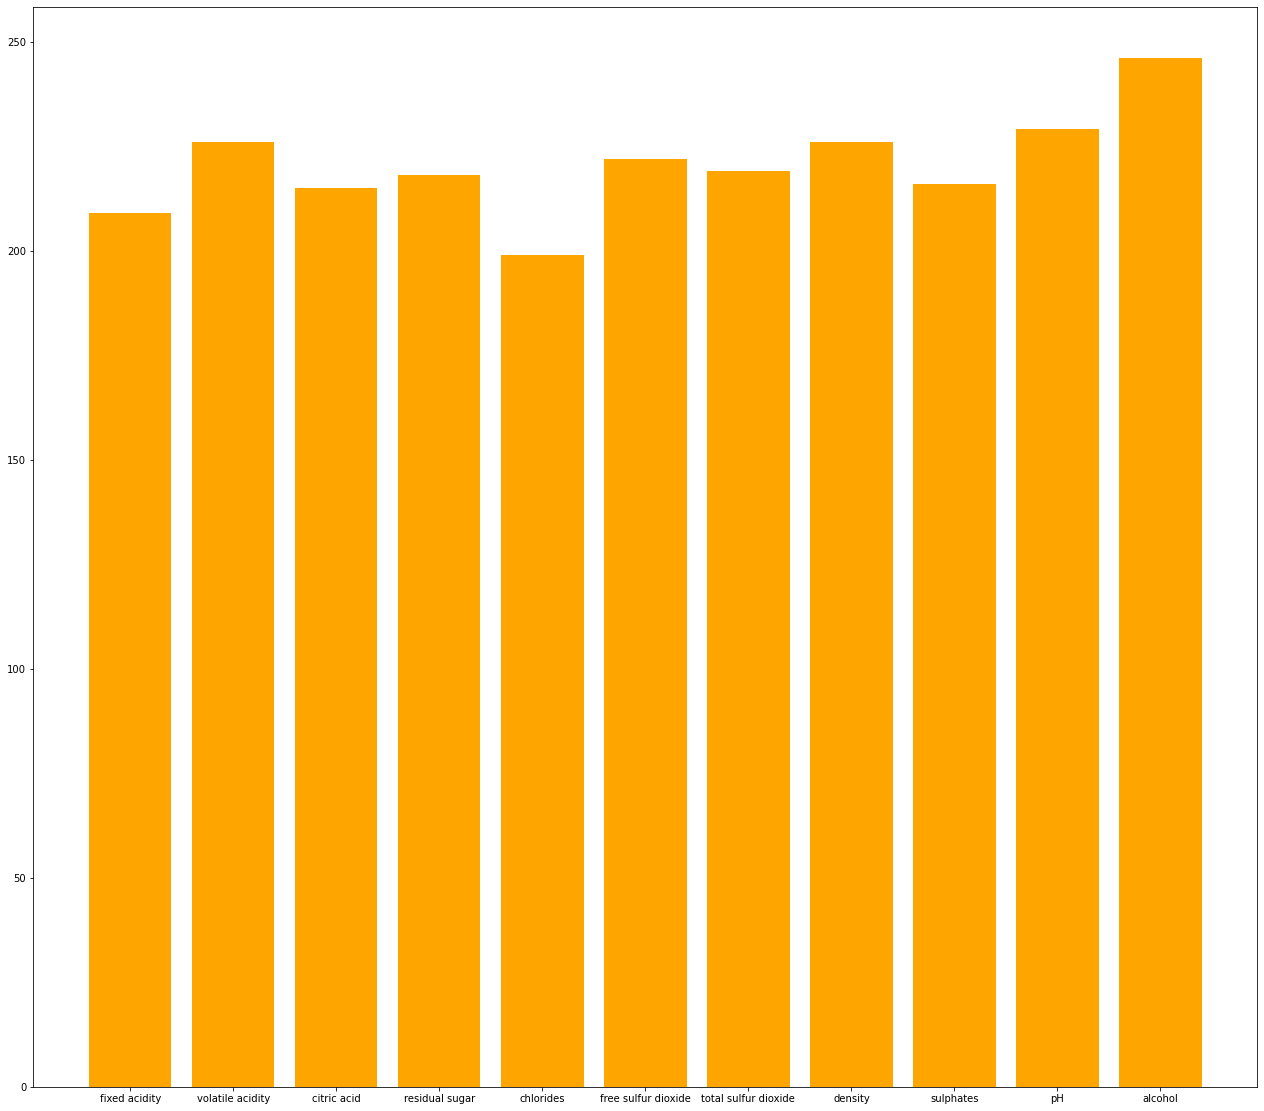

In [34]:
fig=plt.figure(figsize=(17,15))

ax=fig.add_axes([0,0,1,1])
att=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','pH','alcohol']
predicts=[predFAr,predVAr,predCAr,predRSr,predCLr,predFSDr,predTSDr,predDr,predPHr,predSUr,predALCr]
ax.bar(att,predicts,color='orange')
plt.show()